<a href="https://colab.research.google.com/github/TuMyXx93/Analisis_de_datos_etapa2/blob/main/1_1_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión lineal para predecir los gastos médicos de pacientes

Para este ejercicio estaré utilizando los datos presentados en [este](https://www.kaggle.com/datasets/mirichoi0218/insurance) dataset de Kaggle, en el cuál se presentan datos de seguros médicos.

Lo primero que se hará es descargar la librería llamada regressors que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [ ]:
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12400 sha256=083e5abb146a21747b1e8c7f6fc18712f88579b2c641f4cab8c60b580605f91f
  Stored in directory: /root/.cache/pip/wheels/46/c3/e9/d1797db3a01a1f101ad3cbcdf01b1be7273a25c78c77dd4bb9
Successfully built regressors


In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

#Descaragando los datos

Descarguemos los datos y veamos cómo se ven.

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Analizando los datos

Se empezará viendo cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<AxesSubplot:>

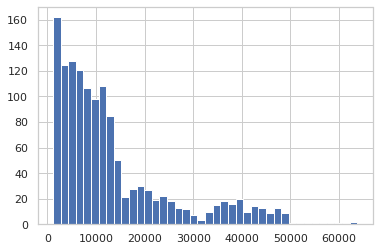

In [ ]:
print(df.shape)
df.charges.hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50.000, esto pues parece haber muy pocos de este lado.

In [ ]:
df[df.charges>50000]
df = df[df.charges<50000]

En este caso al ser pocos datos (6 de 1338) eliminaré estos datos a típicos pues a modo didáctico creo que producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar **NO ELIMINEN** datos a típicos sin antes conocer a alguien que conozca o sea experto en los datos.

#Viendo correlaciones

Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan

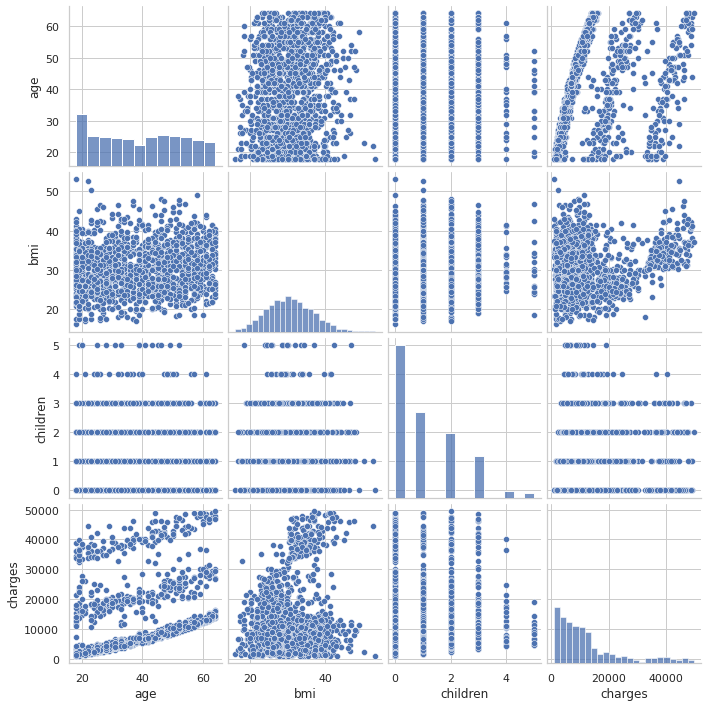

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(df, height=2.5)
plt.show()

<AxesSubplot:>

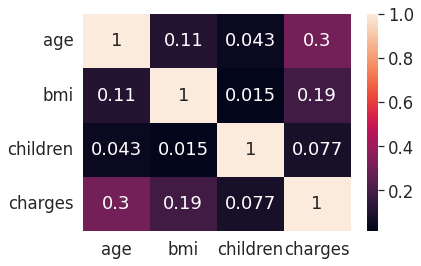

In [ ]:
import numpy as np
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

#Utilizando las demás variables

Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas.

Ahora la verás en acción

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


#Creando modelos

Primero se usará un modelo con todas las variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

x = df[x_cols].values
y = df[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x, y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform((y_test))

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(333, 1)

#Funciones de métricas

El siguiente punto es crear las funciones que se utilizarán para obtener las métricas del modelo.

In [ ]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7628
mse:  0.2537


El siguiente código muestra un resumen general de los resultados.

In [ ]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, x_test, y_test, x_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8575 -0.0754   0.091 0.2403 0.9742


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.001886    0.027731   0.0680  0.945826
region_southeast -0.035489    0.034120  -1.0401  0.299045
children          0.028241    0.027975   1.0095  0.313461
bmi               0.148715    0.029274   5.0802  0.000001
sex_male          0.004742    0.027767   0.1708  0.864500
smoker_yes        0.796232    0.027323  29.1411  0.000000
region_southwest -0.042650    0.032010  -1.3324  0.183648
region_northwest -0.025838    0.031987  -0.8078  0.419803
age               0.322244    0.028326  11.3762  0.000000
---
R-squared:  0.76280,    Adjusted R-squared:  0.75694
F-statistic: 130.24 on 8 features


Finalmente la función que calcula los residuales, es importante notar que es una simple resta entre los valores reales y los predichos.

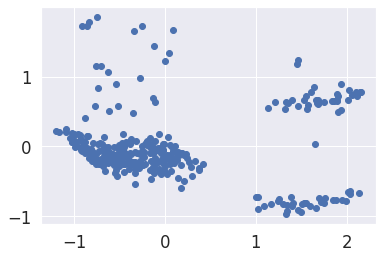

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

#Segundo modelo

Estos resultados de arriba son buenos, pero se pueden mejorar. Se intentará hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [ ]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

Analizando el segundo modelo

In [ ]:
x_cols = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

x = df_second[x_cols].values
y = df_second[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x, y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform((y_test))

model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8136
mse:  0.1891


In [ ]:
model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, x_test, y_test, x_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-2.0385 0.0617  0.1083 0.1382 0.4271


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.023863   0.0000  1.000000
sobrepeso*fumador  0.498591    0.030743  16.2182  0.000000
smoker_yes         0.462303    0.029673  15.5799  0.000000
age2               0.317270    0.023498  13.5019  0.000000
children           0.071068    0.024017   2.9590  0.003308
---
R-squared:  0.81364,    Adjusted R-squared:  0.81136
F-statistic: 358.00 on 4 features


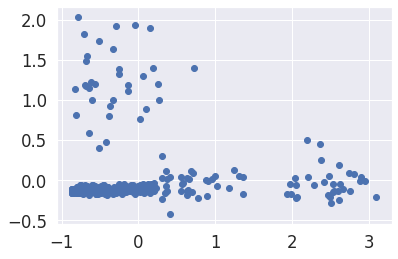

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()